In [126]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import scipy
import csv

In [127]:
loc = 0
scale = 1

general_size = 500000

min_v = loc - scale * 5
max_v = loc + scale * 5
num = 50
step = (max_v - min_v) / num

In [128]:
def histogram(data):
    values, bins = np.histogram(data, np.arange(min_v, max_v, step))
    bins = bins[1:]
    return values, bins

def draw_histogram(data, obj = plt):
    values, bins = histogram(data)

    obj.bar(bins, values)

# General distribution

We will use just the plain old Gauss normal distribution function

num: 500000; avg: 0.00249505347992004; div: 0.9994646999086677


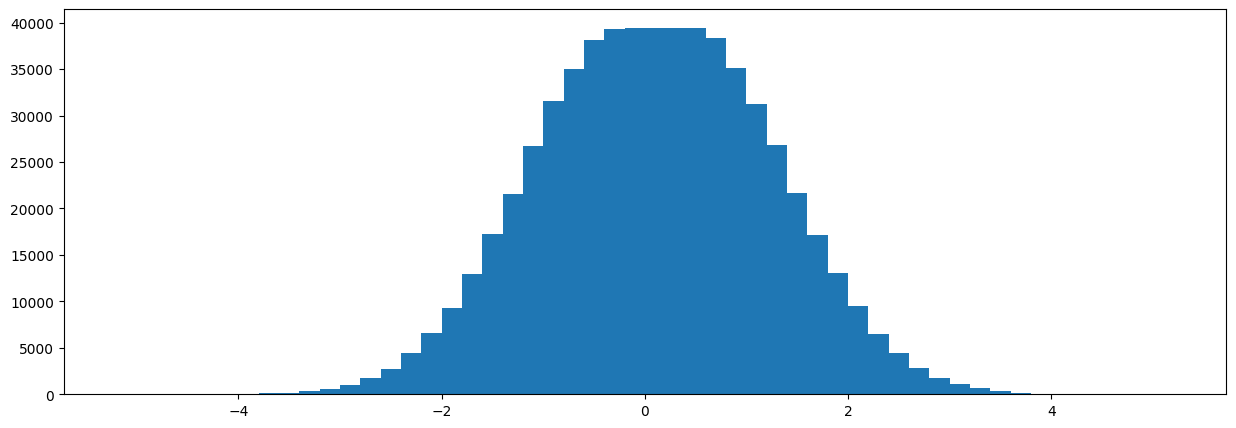

In [129]:
general = np.random.normal(loc, scale, general_size)
draw_histogram(general)

values, bins = np.histogram(general, np.arange(min_v, max_v, step))
bins = bins[1:]
avg = np.average(general)
div = np.std(general)

print(f"num: {general_size}; avg: {avg}; div: {div}")


# Just random choices

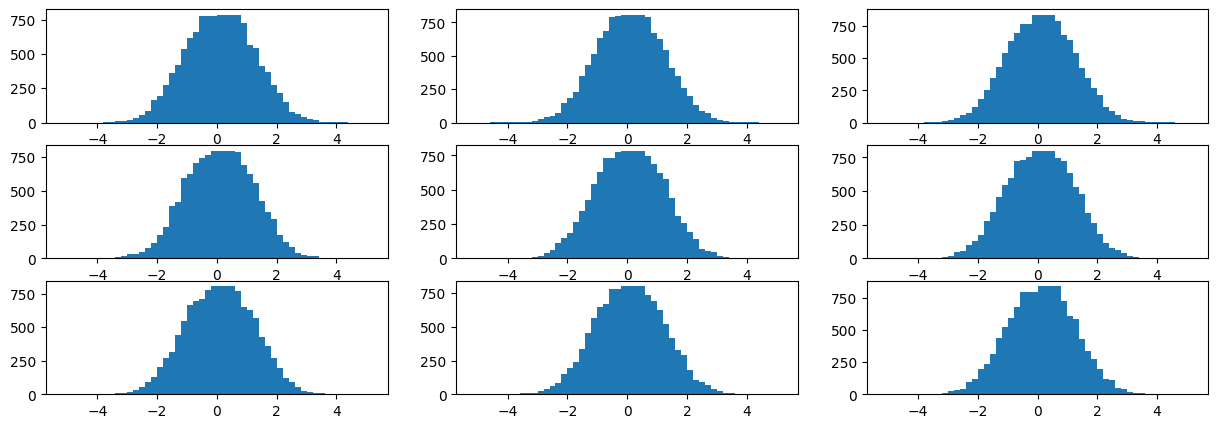

In [130]:
rows = 3
cols = 3
fig, plts = plt.subplots(rows, cols)
for x in range(0, cols):
    for y in range(0, rows):
        draw_histogram(data=np.random.choice(general, 10000), obj=plts[y][x])


# Asymptotically normal

In [131]:
choice_size = 1000
def make_ninf(nums, fn):
    r = []

    for _ in range(nums):
        data = np.random.choice(general, choice_size)
        r.append(fn(data))


    return r

def make_plot(nums, fn, v, title):
    data = make_ninf(nums, fn)
    plt.hist(data)
    avg = np.average(data)
    std = np.std(data)
    plt.ylabel = v
    plt.xlabel = "choice size"
    plt.title(f"{title} (avg: {avg:.2f}, std: {std:.2f})")
    plt.show()


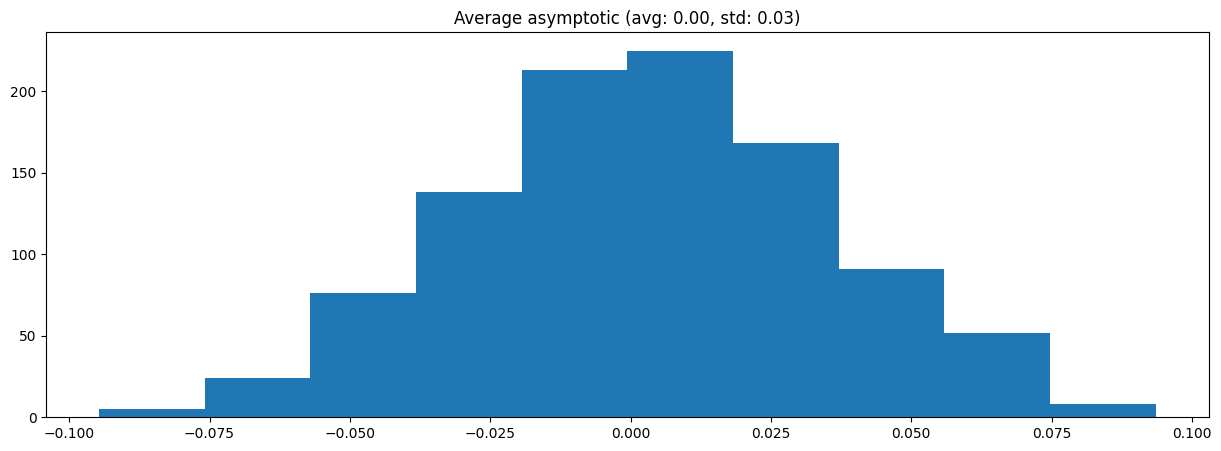

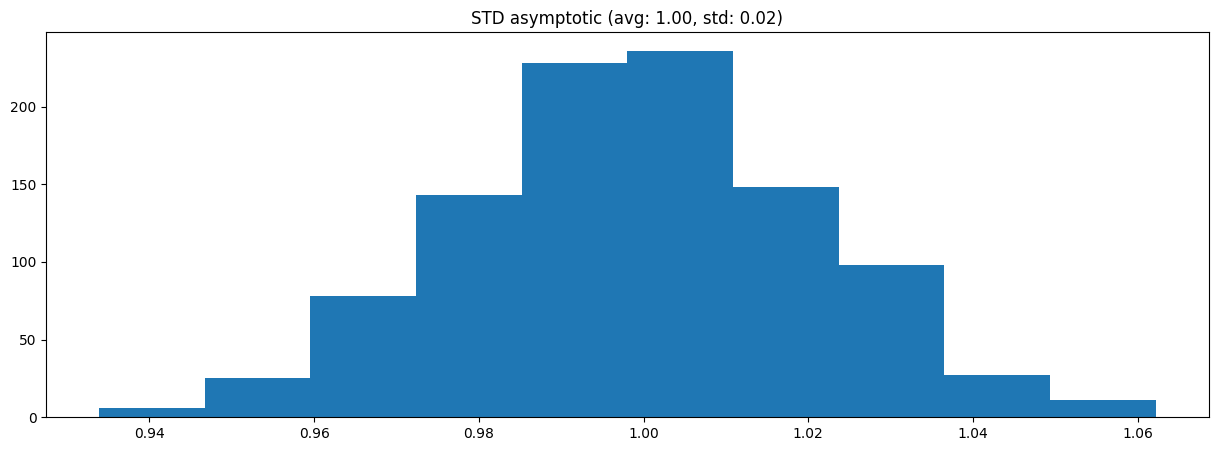

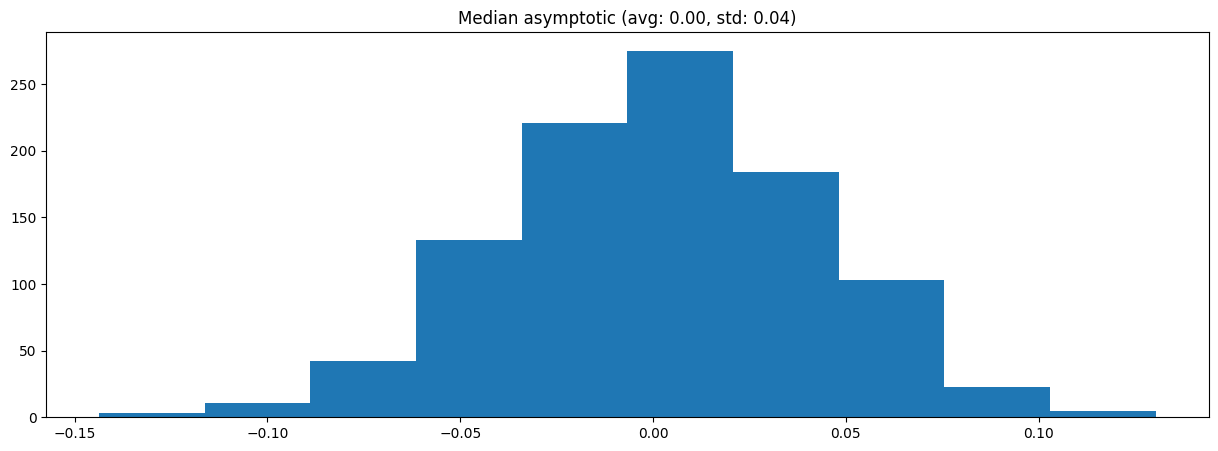

In [132]:
nums = 1000
make_plot(nums, np.average, "avg", "Average asymptotic")
make_plot(nums, np.std, "std", "STD asymptotic")
make_plot(nums, np.median, "med", "Median asymptotic")



# Now we're going to prove smth

## $nF(X_{(2)}) \rightarrow U_1 \sim \Gamma(2, 1)$

In [133]:
def make_fx2(num):
    def choose_x2():
        arr = np.random.choice(general, num)
        idx = np.argpartition(arr, 1)
        return arr[idx[1]]

    choice = list([choose_x2() for _ in range(num)])
    choice.sort()

    class x2(scipy.stats.rv_continuous):

        def _cdf(self, x, *args):
            return np.searchsorted(choice, x) / len(choice)

        def _ppf_single(self, q, *args):
            return choice[min(len(choice) - 1, int(len(choice) * q))]

    return x2()


In [134]:
make_fx2(10)

<__main__.make_fx2.<locals>.x2 at 0x12e30a4d0>

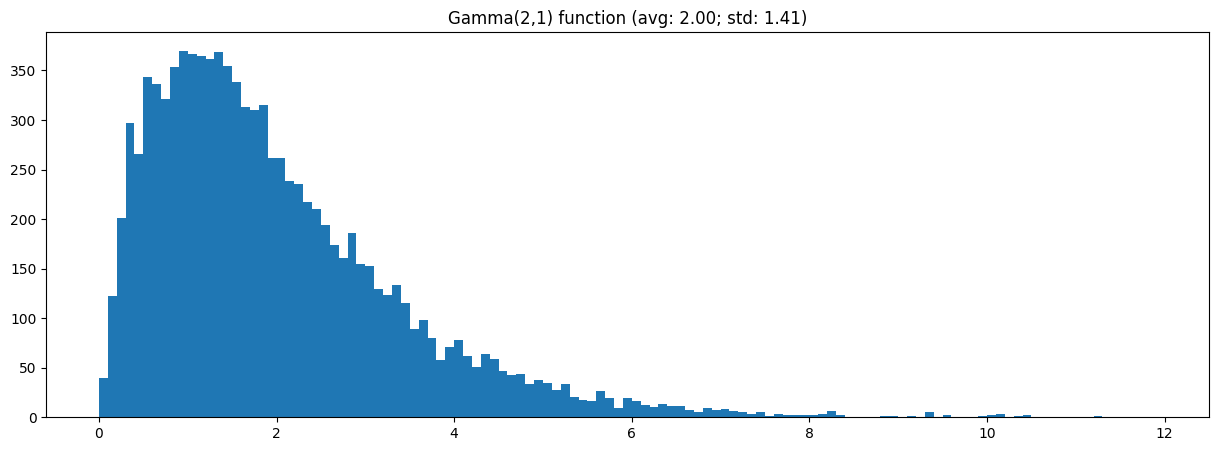

/Users/justagod/Projects/matstat1/venv/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:1931: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


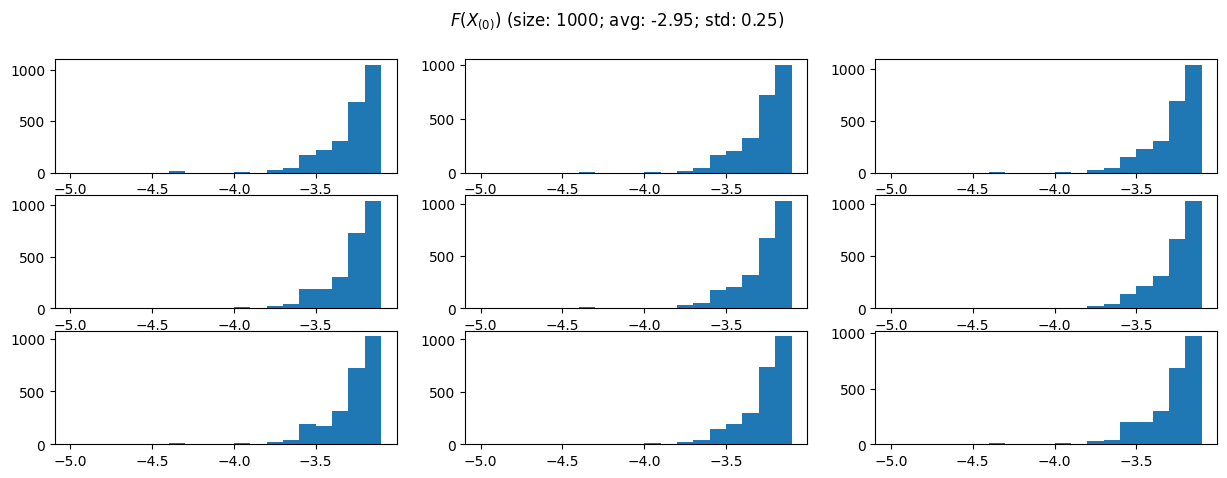

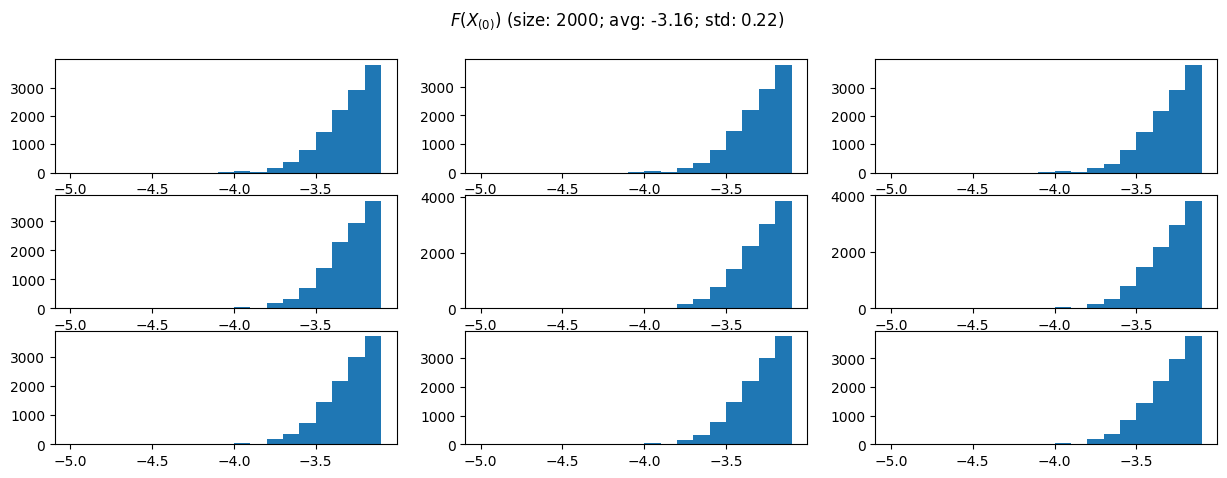

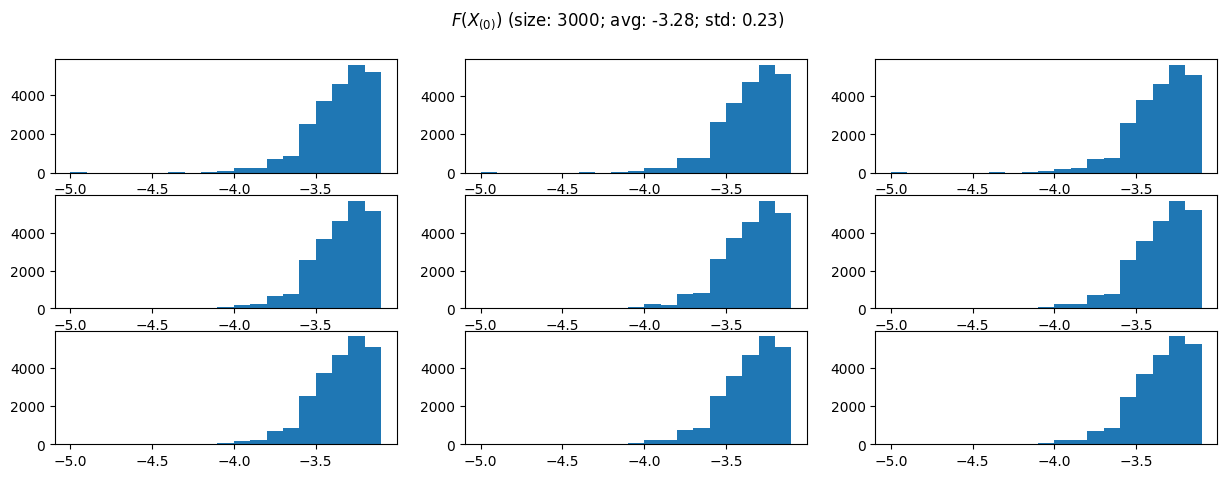

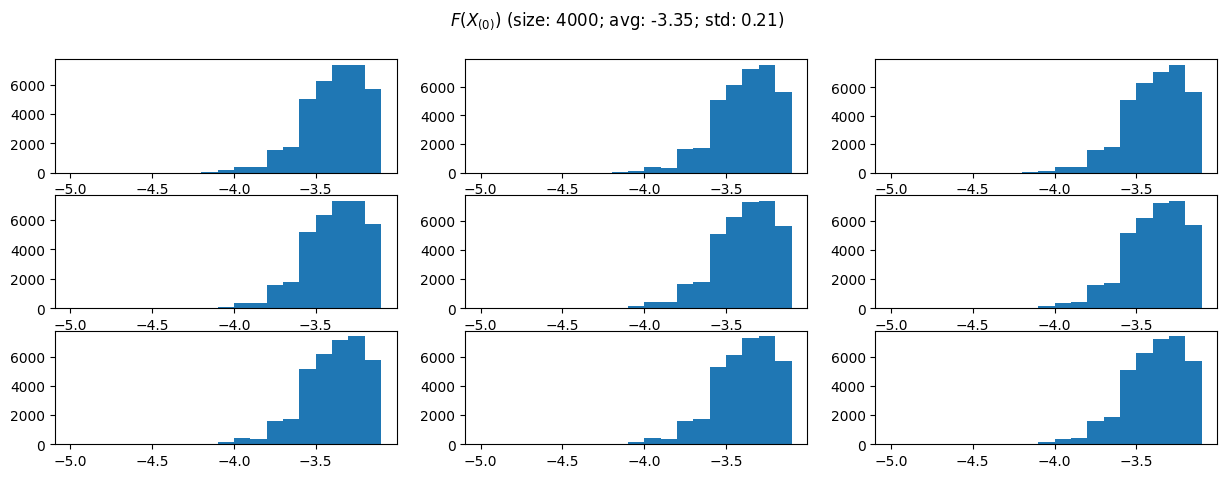

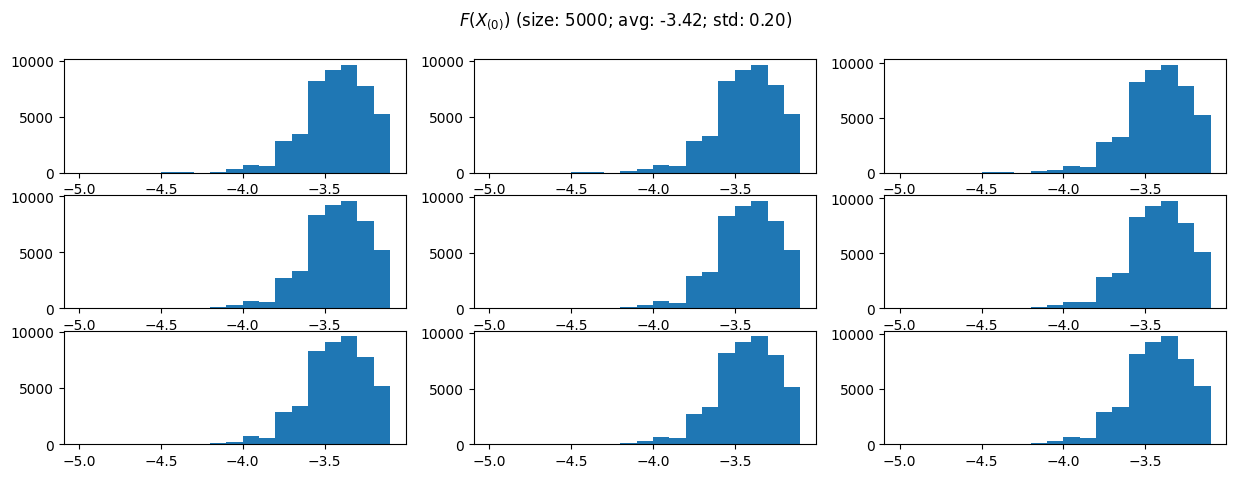

In [135]:
bins = np.arange(-5, -3, 0.1)
gamma = scipy.stats.gamma.rvs(2, size=10000)
plt.hist(gamma, np.arange(0, 12, 0.1))
plt.title(f"Gamma(2,1) function (avg: {scipy.stats.gamma.mean(2):.2f}; std: {scipy.stats.gamma.std(2):.2f})")
plt.show()


for i in range(5):
    size = (i+1) * 1000
    gen = make_fx2(size)
    fig, plots = plt.subplots(3, 3)
    fig.suptitle(f"$F(X_{{(0)}})$ (size: {size}; avg: {gen.mean():.2f}; std: {gen.std():.2f})")
    for pp in plots:
        for p in pp:
            p.hist(gen.rvs(size=size*10), bins)



It looks like gamma-function has a tail on the right hand when $F(X_{(2)})$ has tail on the opposite side. But those histograms looks similar nonetheless.

## $n(1 - F(X_{(n)})) \rightarrow U_1 \sim \Gamma(1, 1) = \text{Exp}(1)$

In [136]:
def make_fxn(num):
    def choose_xn():
        arr = np.random.choice(general, num)
        return np.max(arr)

    choice = list([choose_xn() for _ in range(num)])
    choice.sort()

    class x2(scipy.stats.rv_continuous):

        def _cdf_single(self, x, *args):
            return (len(choice) - np.searchsorted(choice, x)) / len(choice)

        def _ppf_single(self, q, *args):
            return choice[min(len(choice) - 1, int(len(choice) * (1-q)))]

    return x2()

In [137]:
make_fxn(10).rvs(size=10)

array([1.72113194, 1.84154708, 1.63625666, 1.2988356 , 1.63625666,
       0.59590842, 1.9804474 , 1.84154708, 1.51538046, 1.5164549 ])

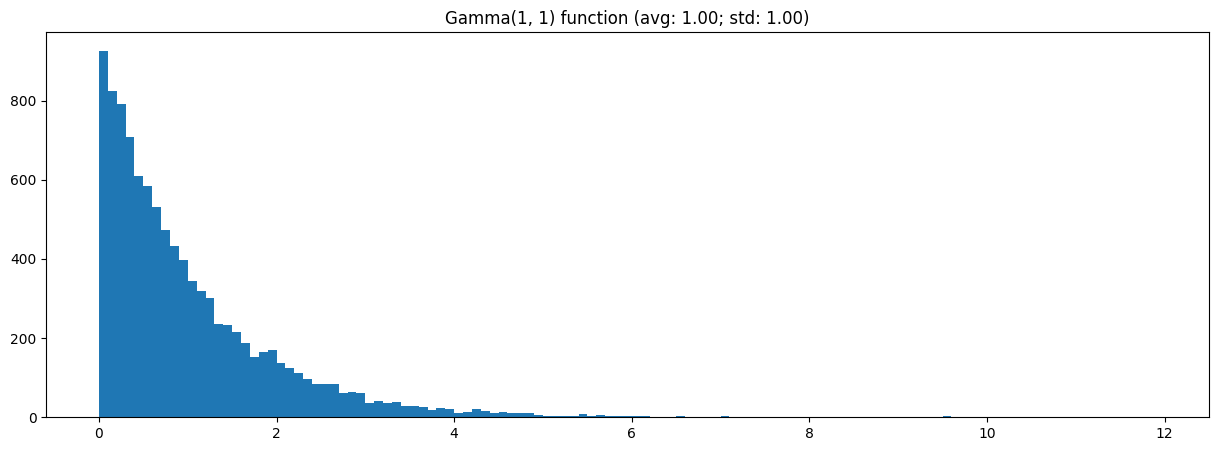

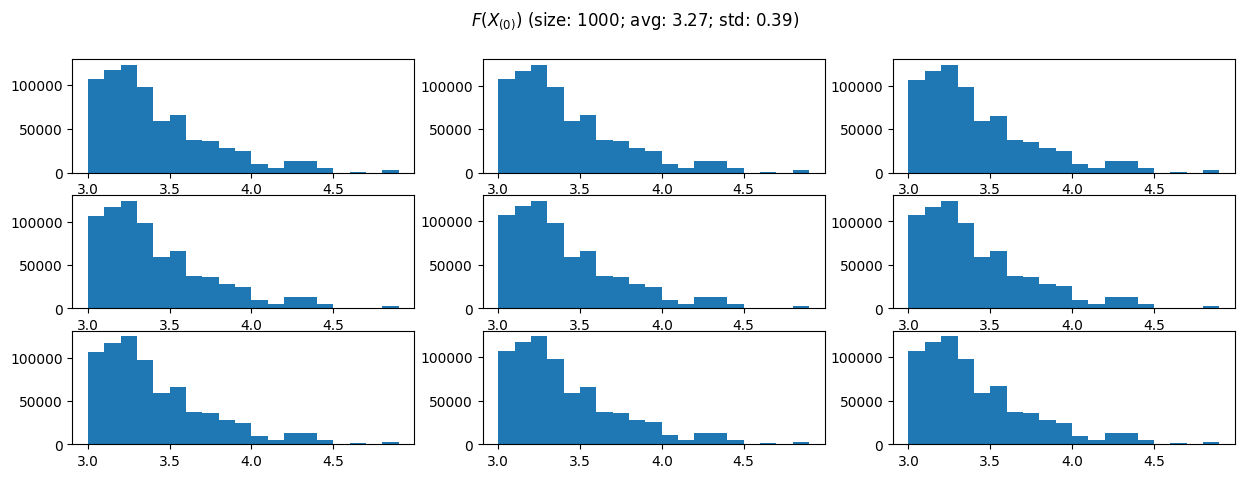

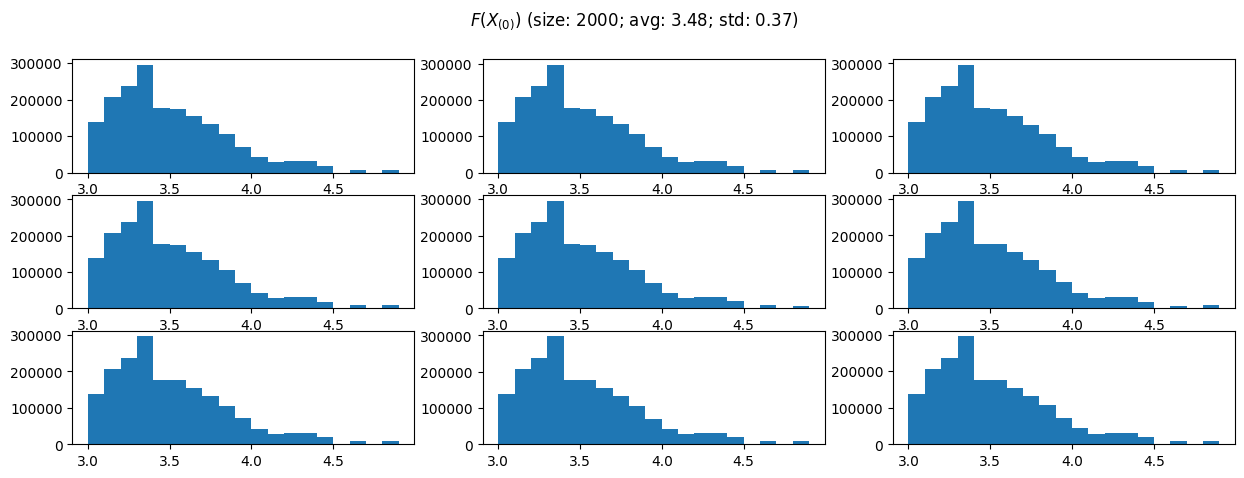

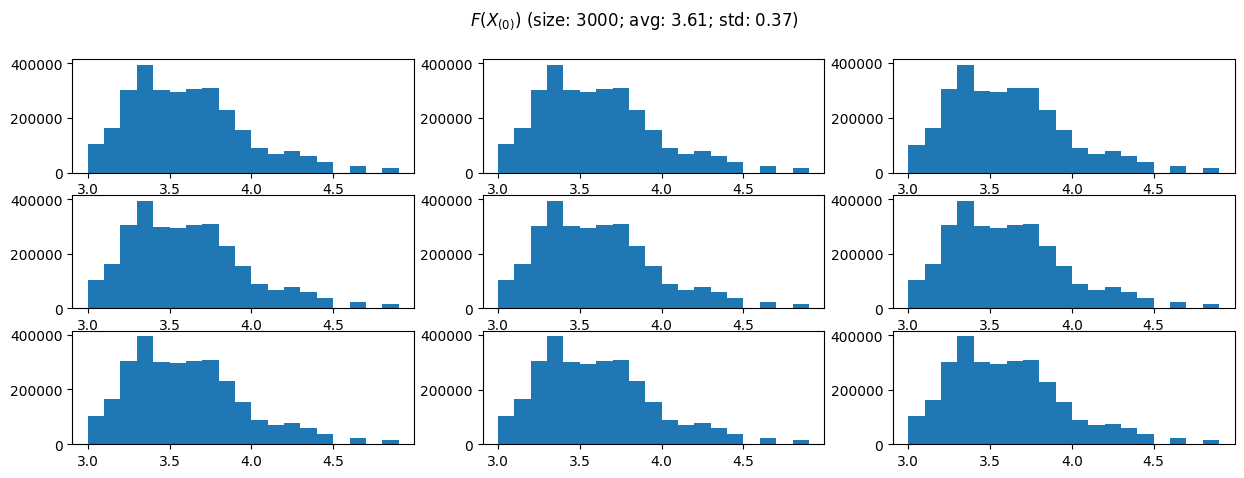

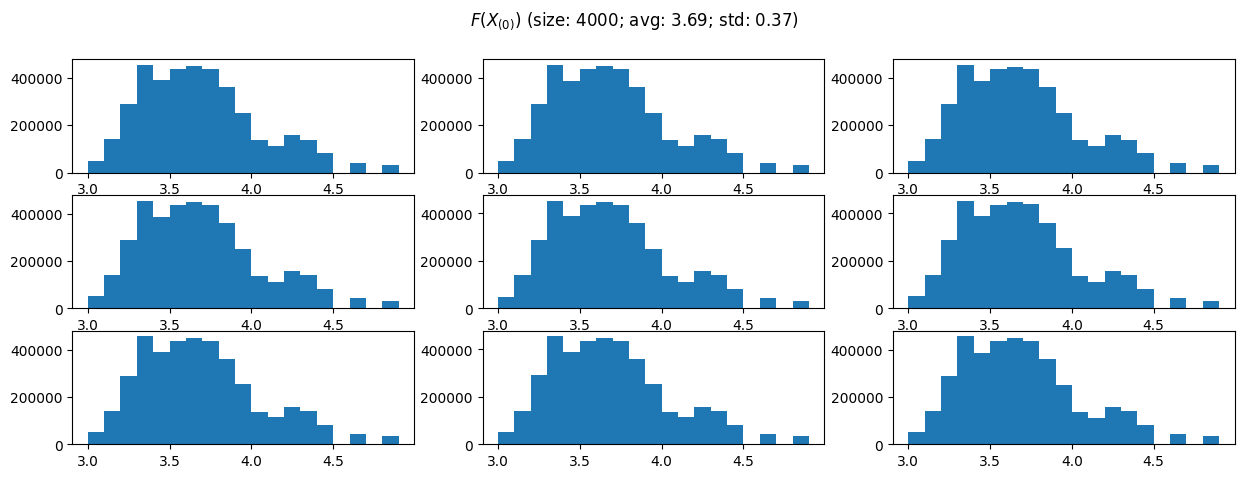

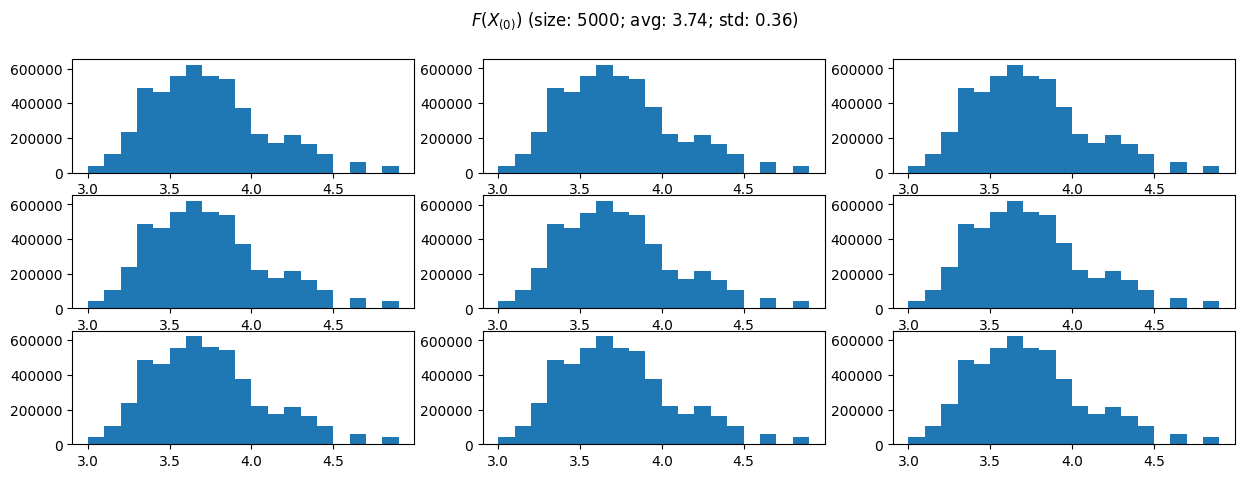

In [138]:
bins = np.arange(3, 5, 0.1)
gamma = scipy.stats.gamma.rvs(1, size=10000)
plt.hist(gamma, np.arange(0, 12, 0.1))
plt.title(f"Gamma(1, 1) function (avg: {scipy.stats.gamma.mean(1):.2f}; std: {scipy.stats.gamma.std(1):.2f})")
plt.show()


for i in range(5):
    size = (i+1) * 1000
    gen = make_fxn(size)
    fig, plots = plt.subplots(3, 3)
    fig.suptitle(f"$F(X_{{(0)}})$ (size: {size}; avg: {gen.mean():.2f}; std: {gen.std():.2f})")
    for pp in plots:
        for p in pp:
            p.hist(gen.rvs(size=size*1000), bins)


# Iris

In [139]:
class iris:

    def __init__(self, petal_length, petal_width, sepal_length, sepal_width, name):
        self.petal_length = petal_length
        self.petal_width = petal_width

        self.sepal_length = sepal_length
        self.sepal_width = sepal_width

        self.name = name

def read_csv():
    with open("iris.csv") as csvfile:
        return list(csv.reader(csvfile))[1:]

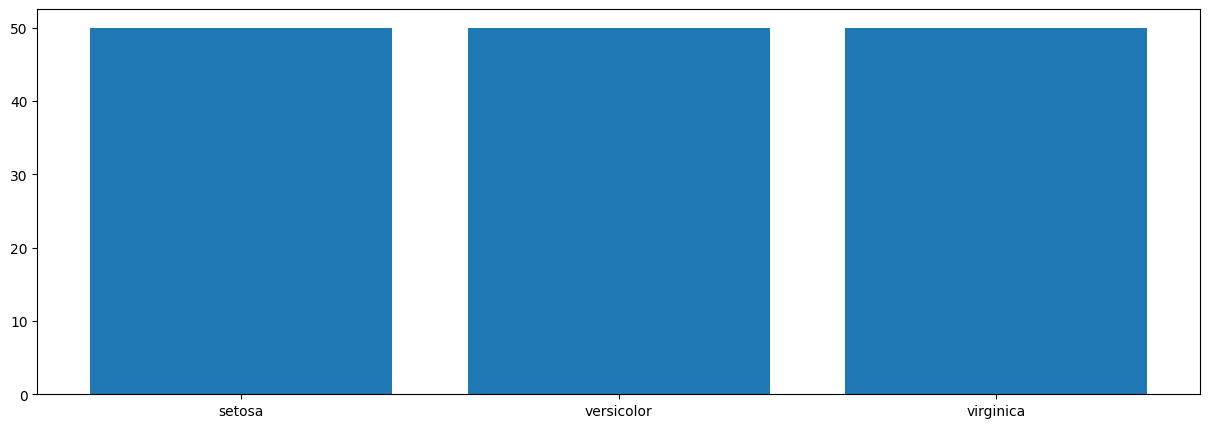

In [140]:
iris_data = read_csv()

def spices_distr():
    distr = dict()
    l = list()
    for [sl, sw, pl, pw, sp] in iris_data:
        i = iris(float(pl), float(pw), float(sl), float(sw), sp)
        distr.setdefault(sp, list()).append(i)
        l.append(i)

    return l, distr

l, distr = spices_distr()

plt.bar(distr.keys(), list(map(len, distr.values())))
plt.show()

As you can see there are same amount of every spice of iris

In [141]:
def build_choices_dist(data, fn):
    choice_size = 15
    num = 10000

    r = []
    for _ in range(num):
        choice = np.random.choice(data, choice_size)
        r.append(fn(choice))

    return r

def plot_distr(data, fn, title, obj):
    v = build_choices_dist(data, fn)
    obj.hist(v)
    avg = np.average(v)
    std = np.std(v)
    obj.title.set_text(f"{title} (avg: {avg:.2f}; std: {std:.2f})")

def plot_stats(data):
    fig, plts = plt.subplots(2, 2)
    plot_distr(data, np.average, "Average general", plts[0][0])
    plot_distr(data, np.std, "STD general", plts[0][1])
    plot_distr(data, np.median, "Median general", plts[1][0])
    def quantile25(v):
        return np.quantile(v, 2/5)
    plot_distr(data, quantile25, "Median general", plts[1][1])

    return fig, plts


/var/folders/cf/2srm7pv16hd55gbpcgp20xmc0000gn/T/ipykernel_9429/3205813985.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


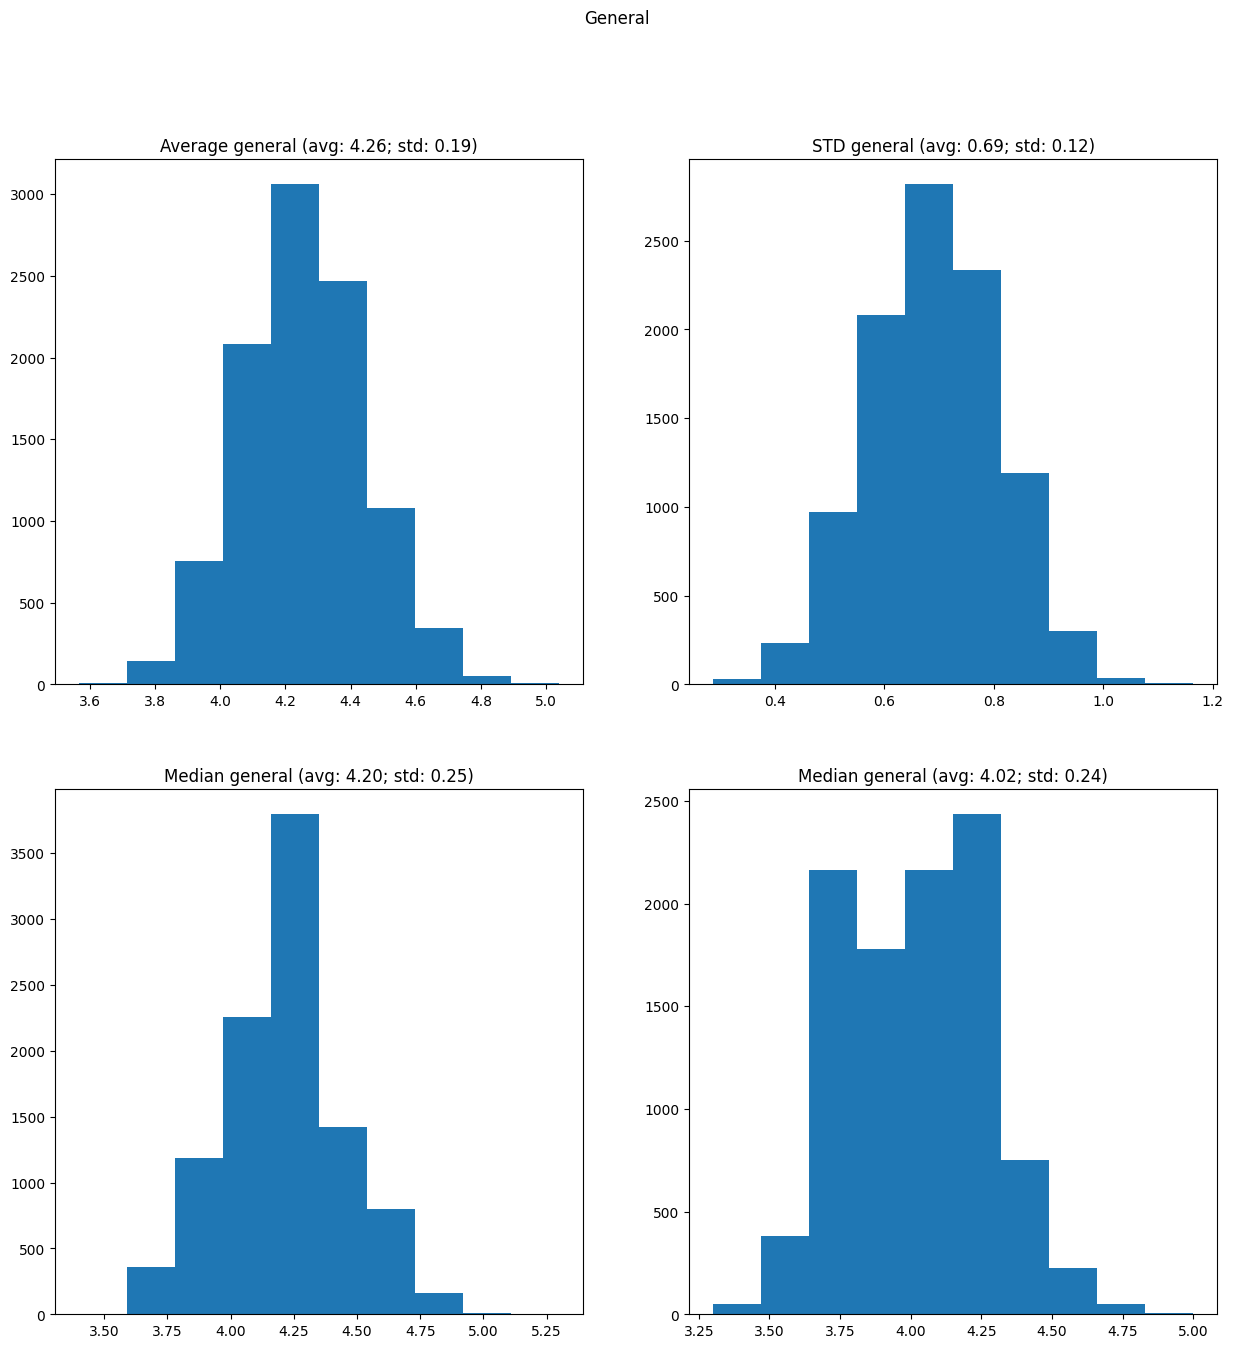

In [142]:
l_mapped = list(map(lambda m : m.petal_width + m.sepal_width, l))

plt.rcParams['figure.figsize'] = [15, 15]
fig, _ = plot_stats(l_mapped)
fig.suptitle("General")
fig.show()


/var/folders/cf/2srm7pv16hd55gbpcgp20xmc0000gn/T/ipykernel_9429/2394133339.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


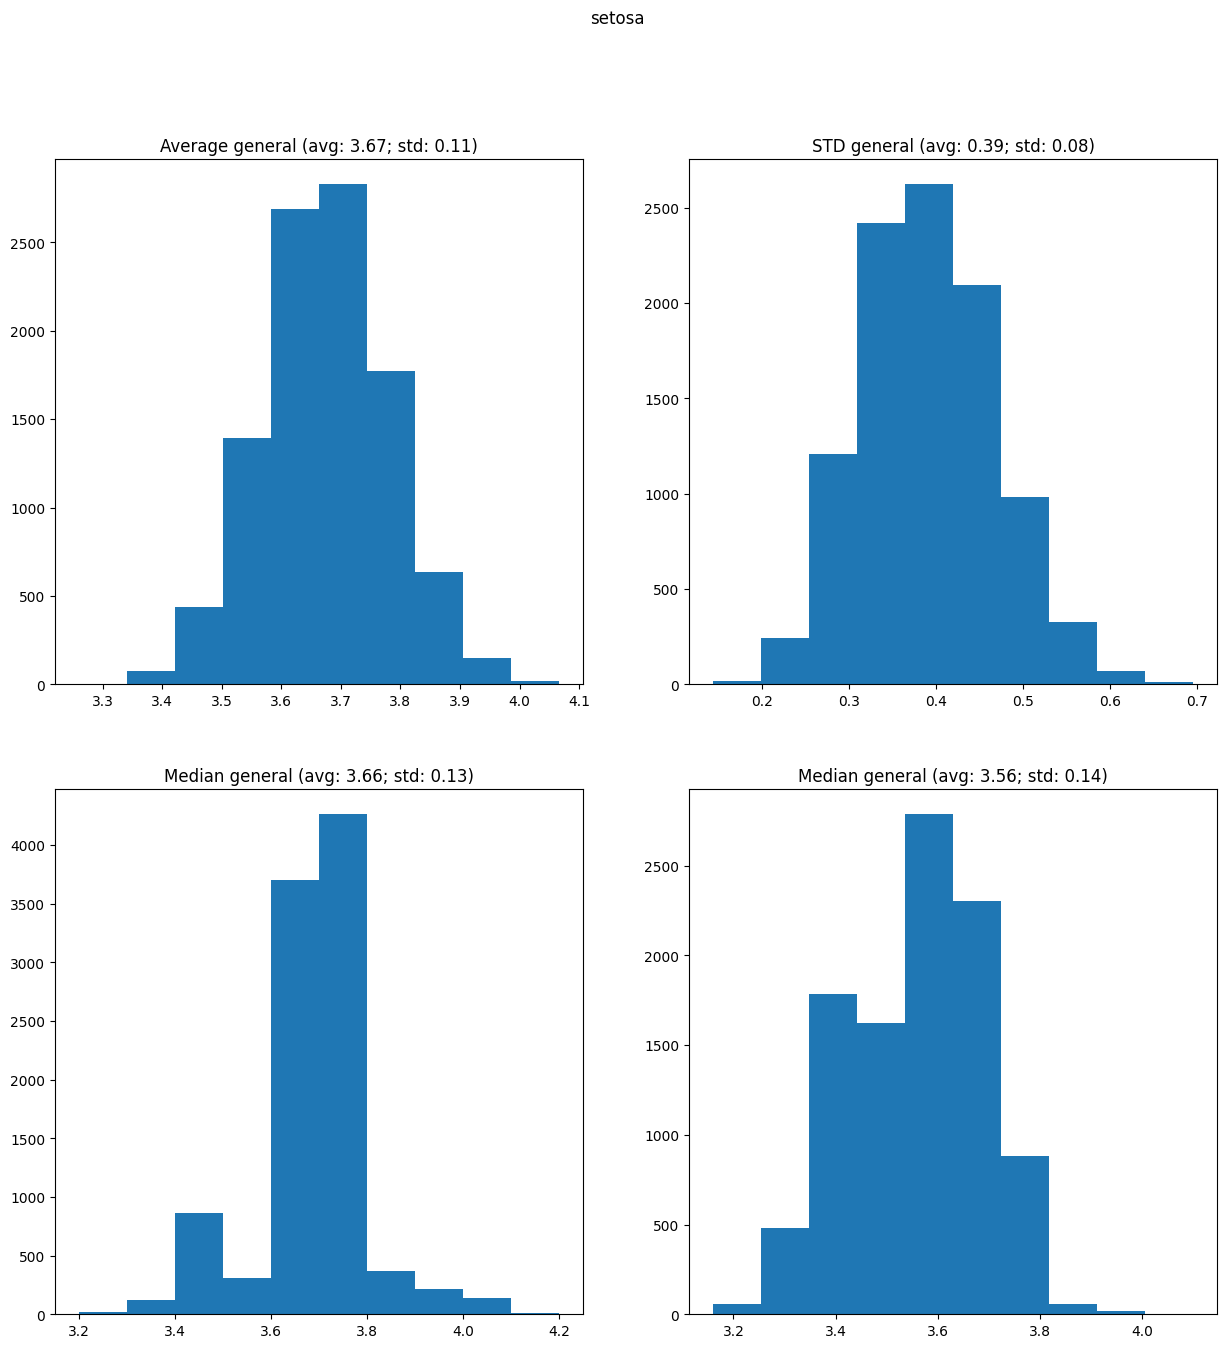

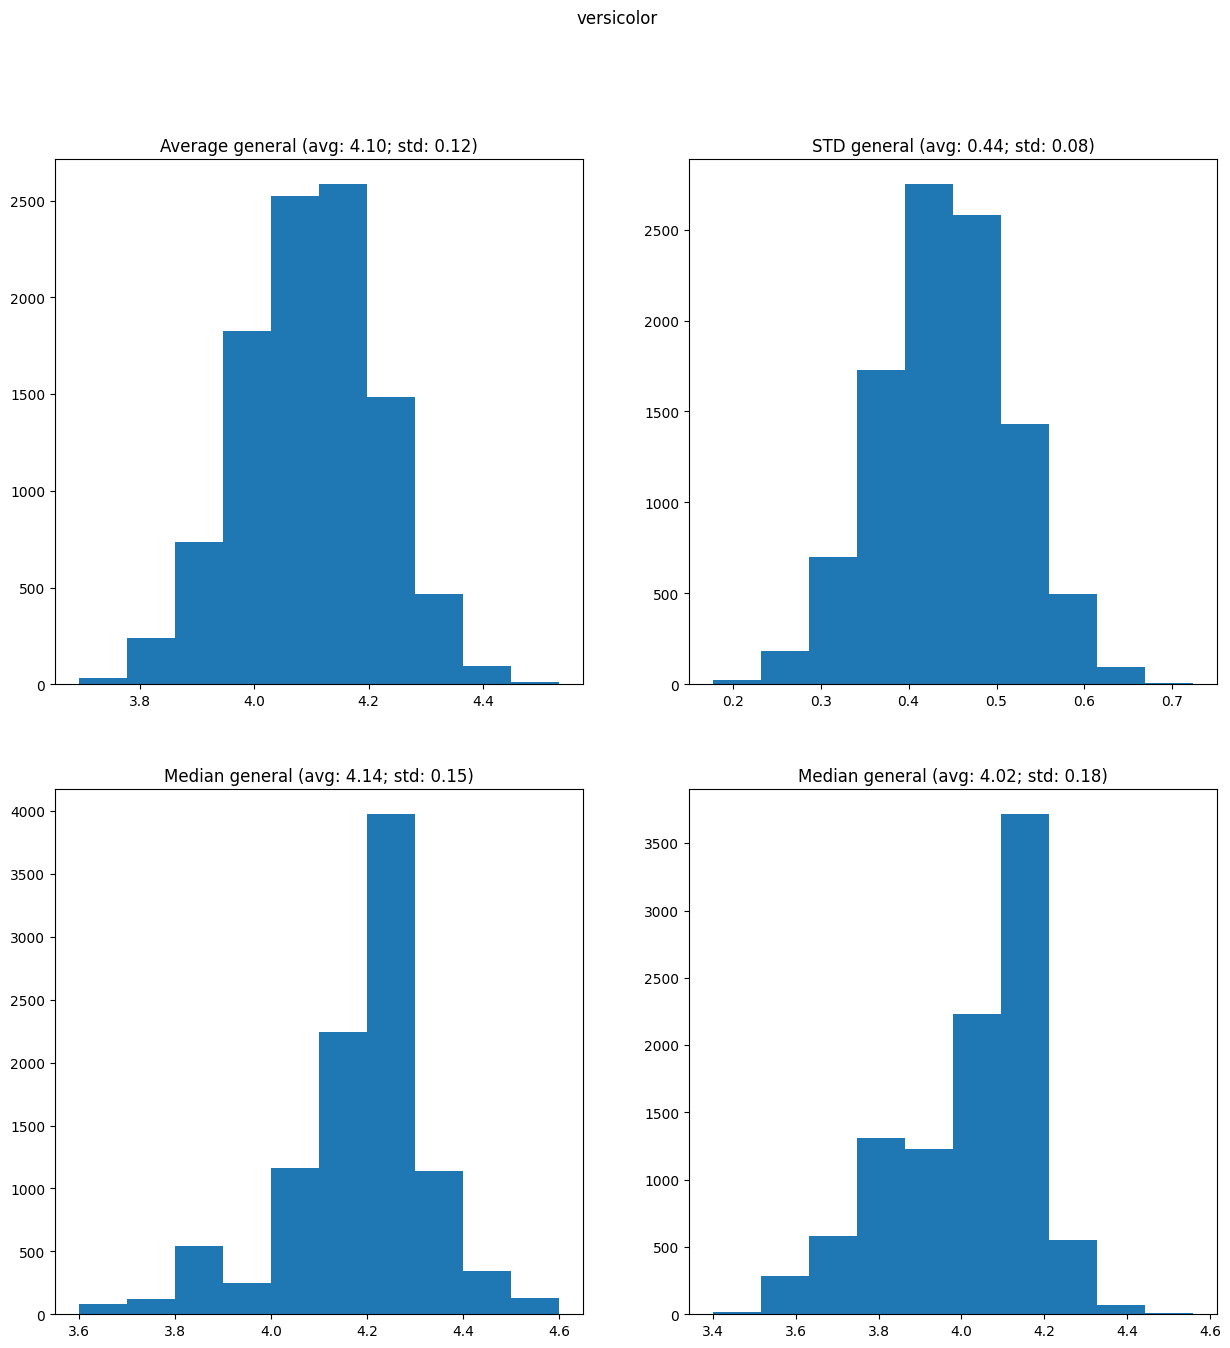

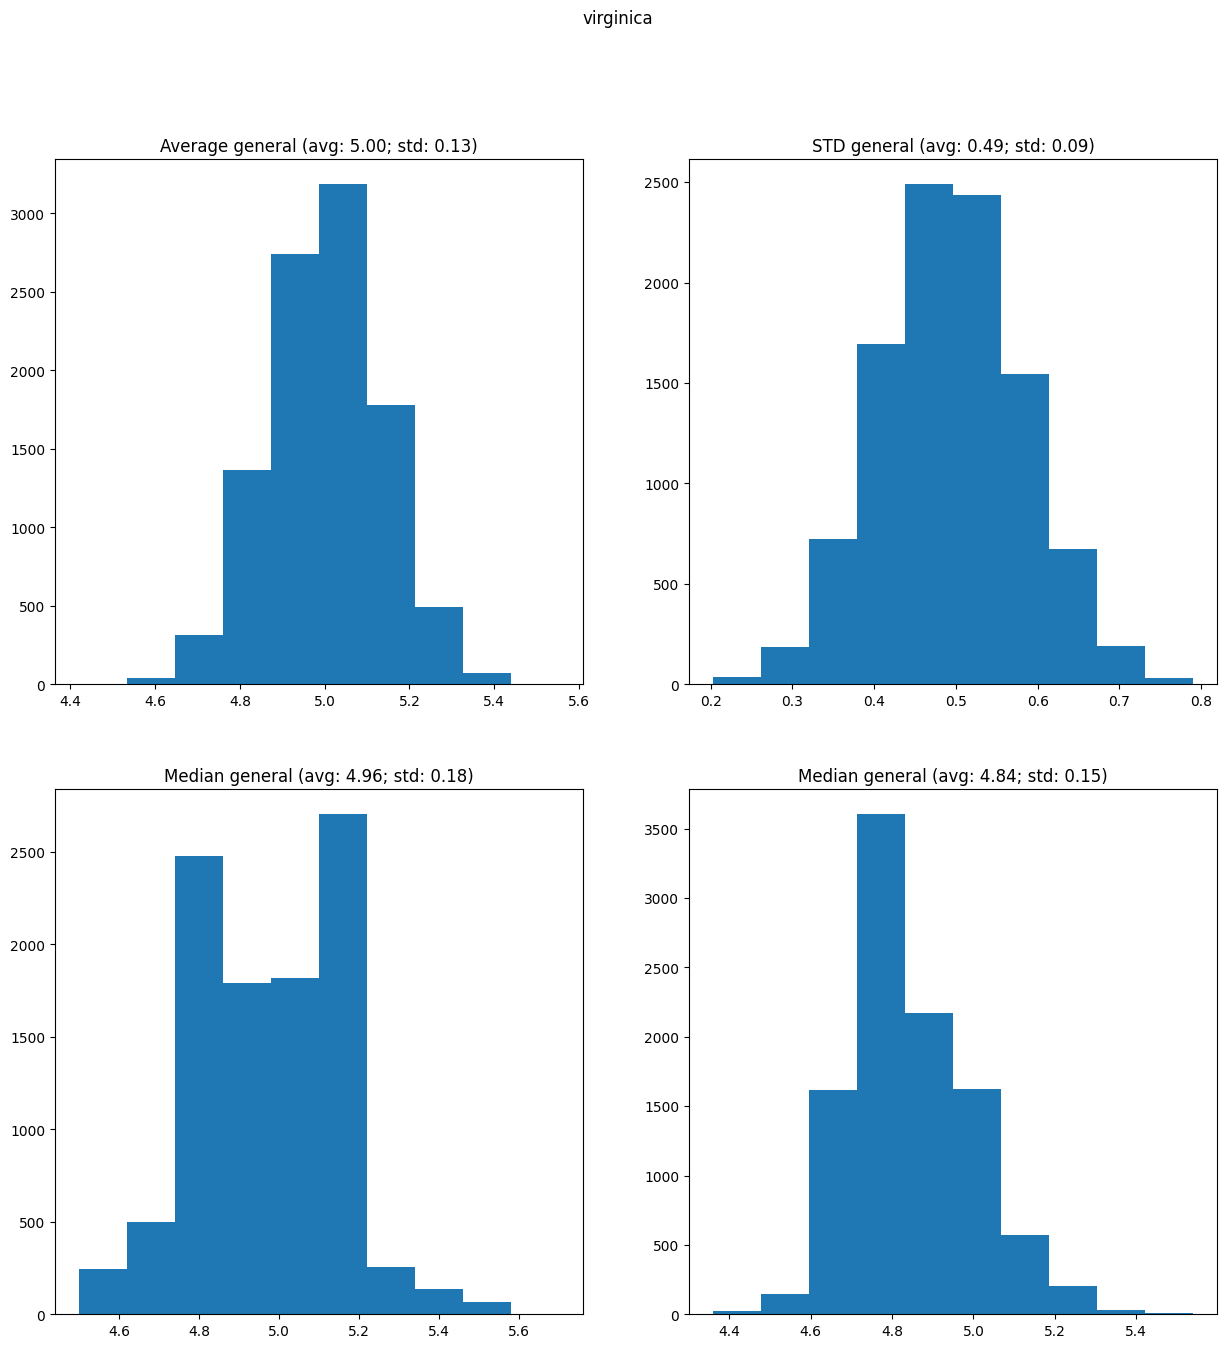

In [143]:
for (name, vv) in distr.items():
    vv_mapped = list(map(lambda m : m.petal_width + m.sepal_width, vv))

    fig, _ = plot_stats(vv_mapped)
    fig.suptitle(name)
    fig.show()


In [144]:
def plot_ecdf(data, into):
    scipy.stats.ecdf(data).cdf.plot(into)

def plot_extended_stats(data):
    fig, plts = plt.subplots(1, 3)
    plot_ecdf(data, plts[0])
    plts[0].title.set_text("ECDF")

    plts[1].hist(data)
    plts[1].title.set_text("Histogram")

    plts[2].boxplot(data)
    plts[2].title.set_text("Box plot")

    return fig, plts



Text(0.5, 0.98, 'General')

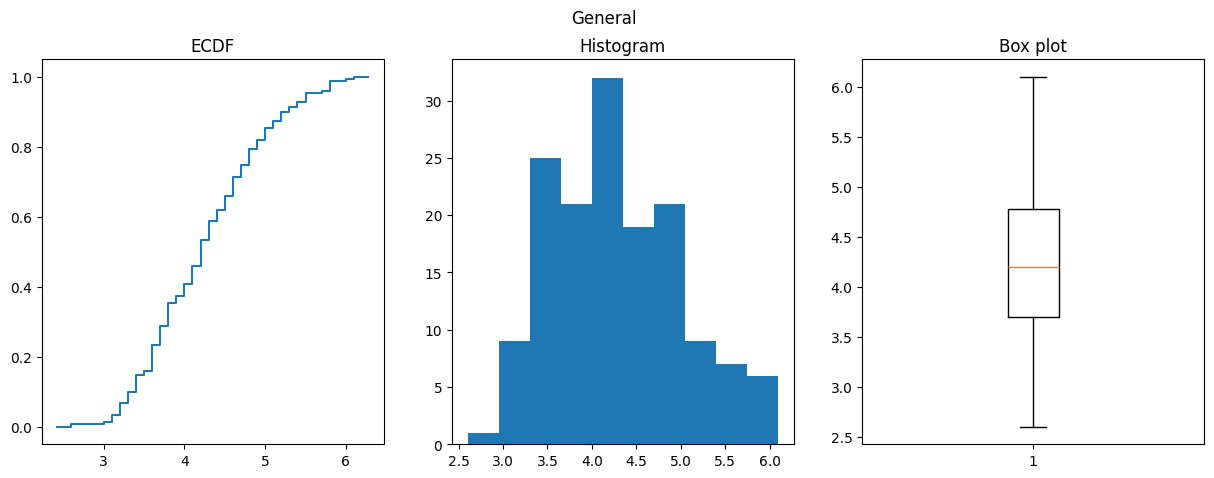

In [145]:
plt.rcParams['figure.figsize'] = [15, 5]
fig, _ = plot_extended_stats(l_mapped)
fig.suptitle("General")

/var/folders/cf/2srm7pv16hd55gbpcgp20xmc0000gn/T/ipykernel_9429/498625634.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/cf/2srm7pv16hd55gbpcgp20xmc0000gn/T/ipykernel_9429/498625634.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/cf/2srm7pv16hd55gbpcgp20xmc0000gn/T/ipykernel_9429/498625634.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


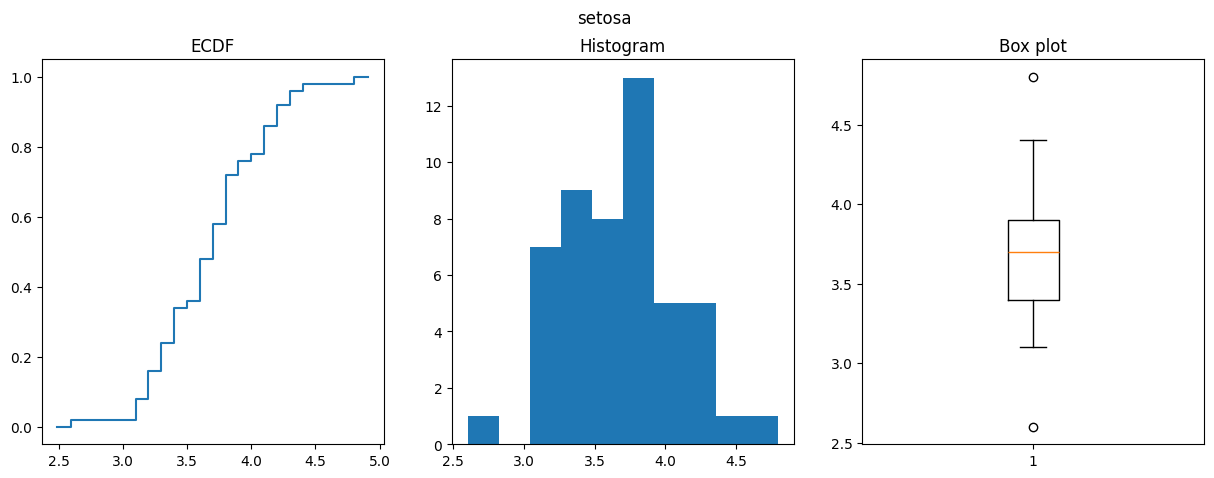

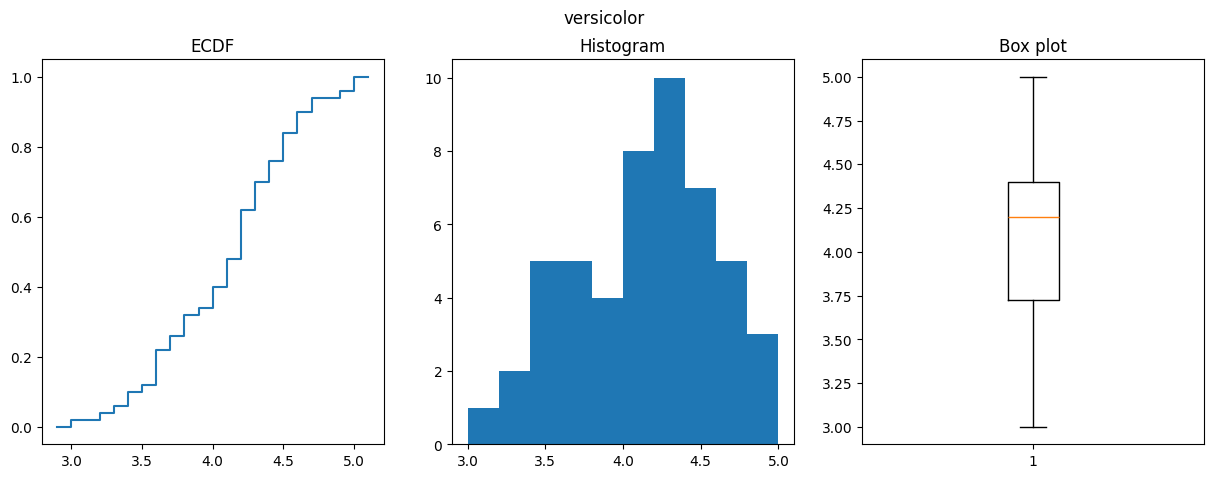

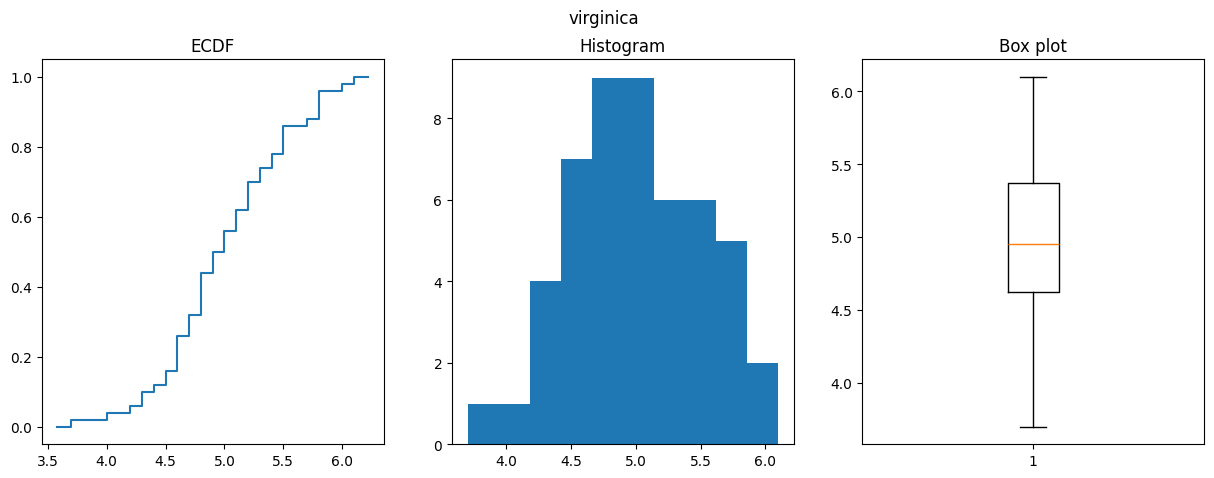

In [146]:
for (name, vv) in distr.items():
    vv_mapped = list(map(lambda m : m.petal_width + m.sepal_width, vv))

    fig, _ = plot_extended_stats(vv_mapped)
    fig.suptitle(name)
    fig.show()
